<a href="https://colab.research.google.com/github/changsksu/KState_IMSE541/blob/main/Lab_2_SQC_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

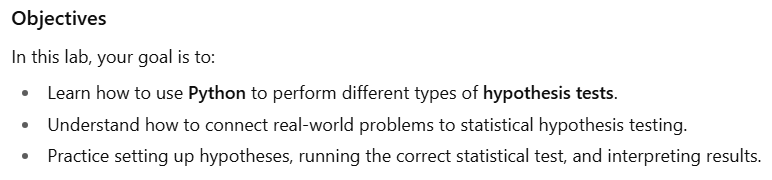

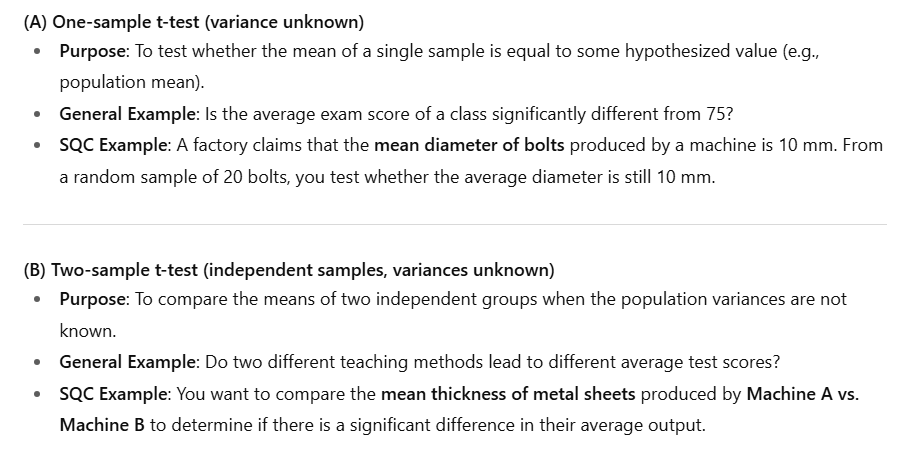

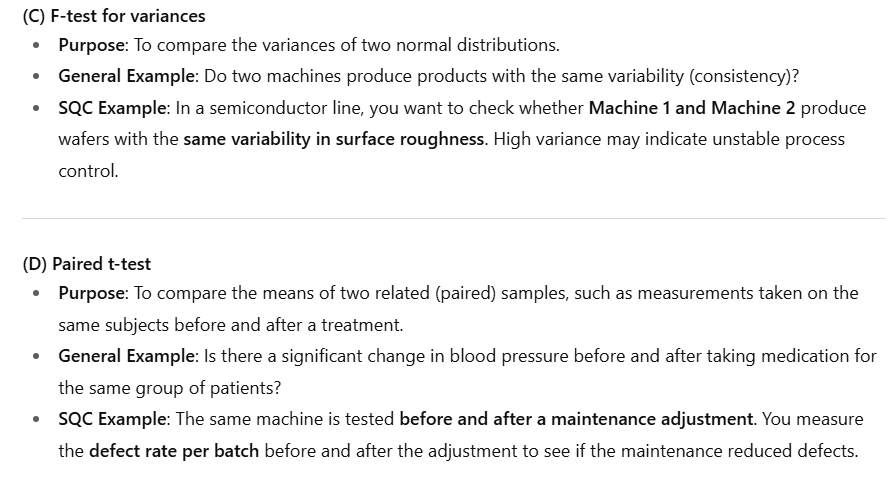

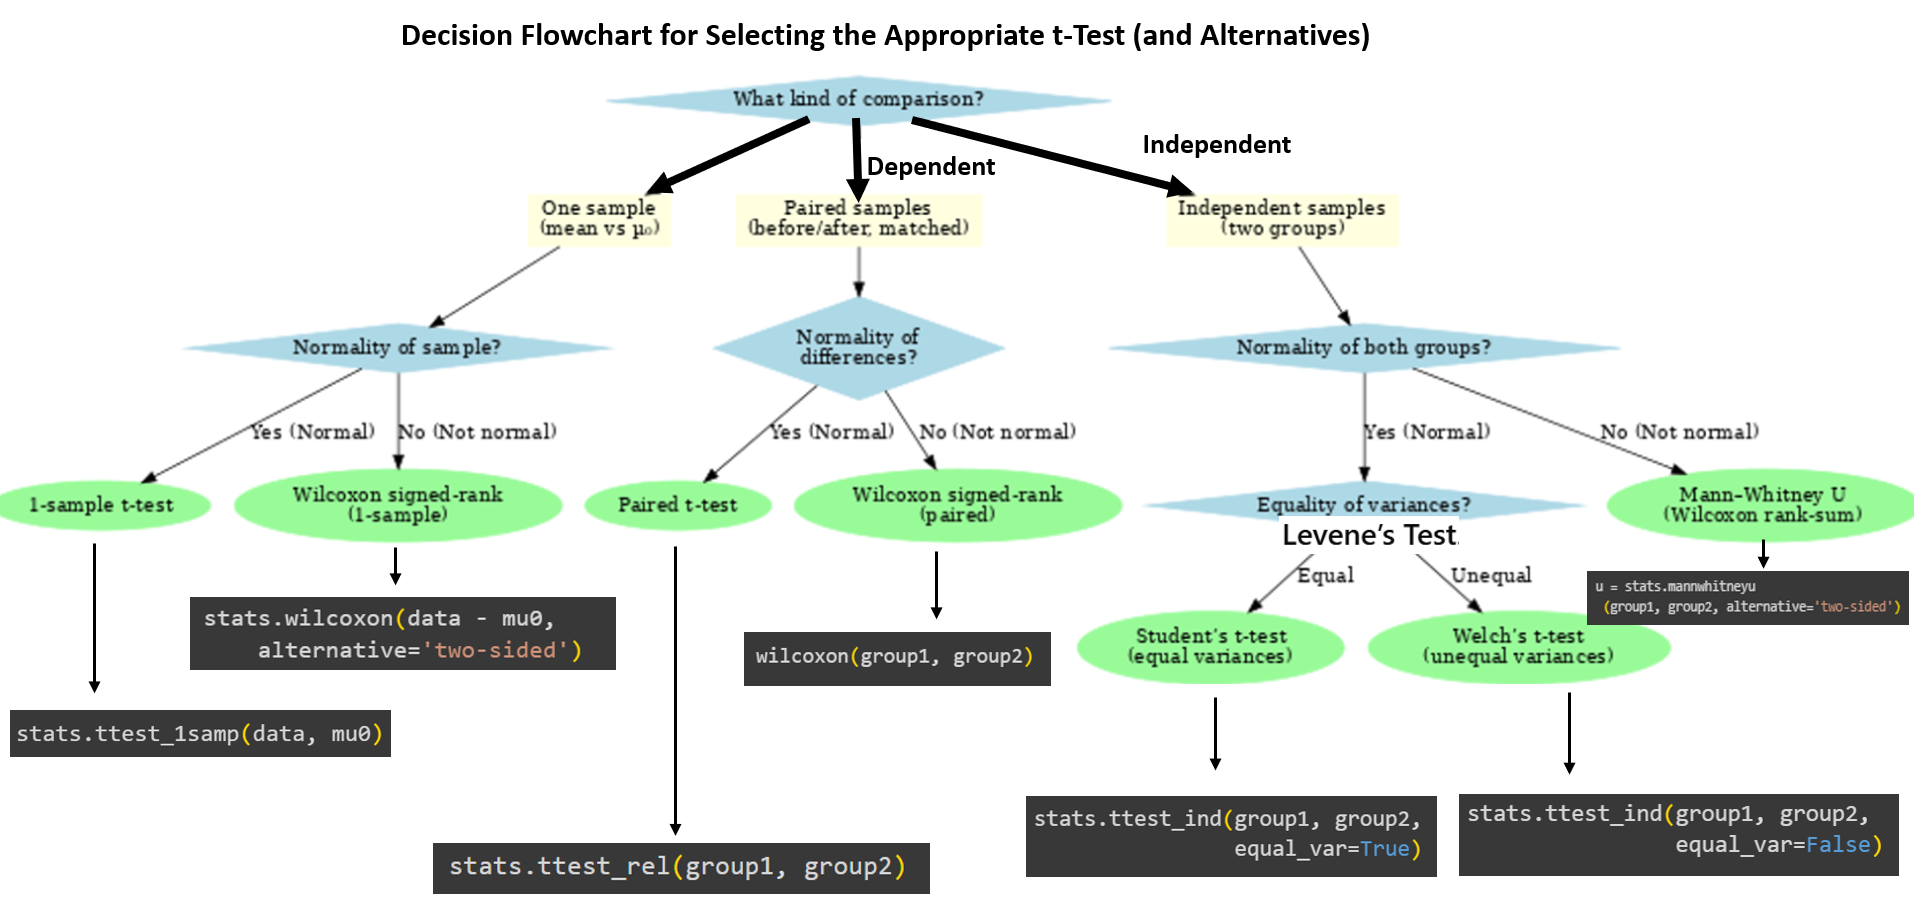

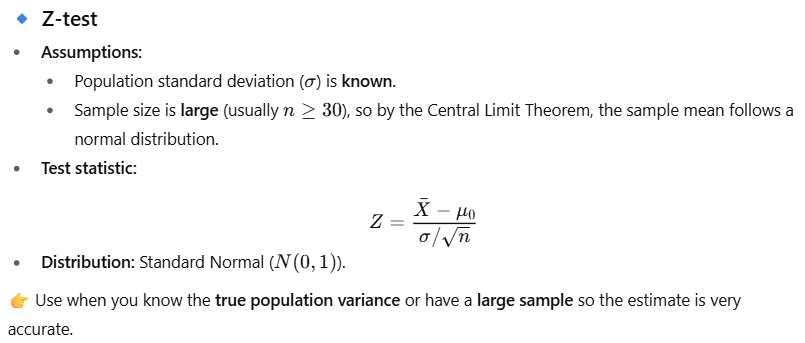

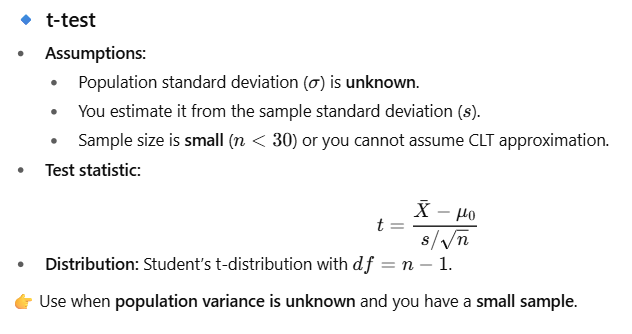


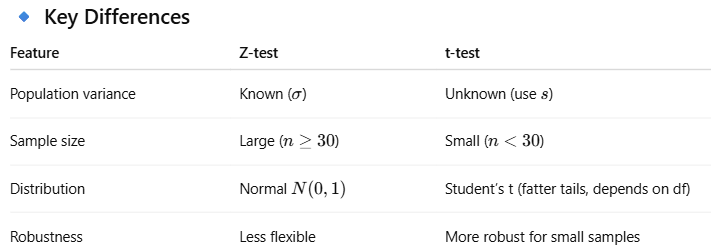

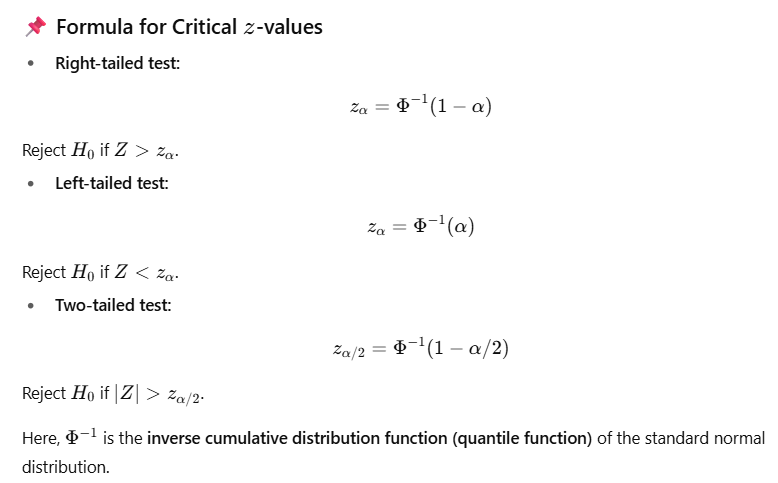

In [ ]:
from scipy.stats import norm

alpha = 0.05  # significance level

# One-tailed (right side)
z_right = norm.ppf(1 - alpha)

# One-tailed (left side)
z_left = norm.ppf(alpha)

# Two-tailed
z_two = norm.ppf(1 - alpha/2)

print("Right-tailed z:", z_right)
print("Left-tailed z:", z_left)
print("Two-tailed z:", z_two)


Right-tailed z: 1.6448536269514722
Left-tailed z: -1.6448536269514729
Two-tailed z: 1.959963984540054


In [ ]:
import numpy as np
from scipy.stats import t

# Parameters
alpha = 0.05   # significance level (for 95% confidence)
n = 20         # sample size
df = n - 1     # degrees of freedom

xbar = 15      # sample mean
s = 2          # sample standard deviation
SE = s / np.sqrt(n)   # standard error

# Critical t values
t_right = t.ppf(1 - alpha, df)       # right-tailed
t_left = t.ppf(alpha, df)            # left-tailed
t_two = t.ppf(1 - alpha/2, df)       # two-tailed

print("Right-tailed t:", t_right)
print("Left-tailed t:", t_left)
print("Two-tailed t:", t_two)

# Confidence Intervals
# Two-sided CI
ci_two = (xbar - t_two * SE, xbar + t_two * SE)
# One-sided CI (right)
ci_right = (xbar - t_right * SE, np.inf)
# One-sided CI (left)
ci_left = (-np.inf, xbar + t_right * SE)

print("Two-sided 95% CI:", ci_two)
print("One-sided 95% CI (right):", ci_right)
print("One-sided 95% CI (left):", ci_left)


Right-tailed t: 1.729132811521367
Left-tailed t: -1.7291328115213678
Two-tailed t: 2.093024054408263
Two-sided 95% CI: (np.float64(14.063971187160181), np.float64(15.936028812839819))
One-sided 95% CI (right): (np.float64(14.226708298262578), inf)
One-sided 95% CI (left): (-inf, np.float64(15.773291701737422))


# One-Sample

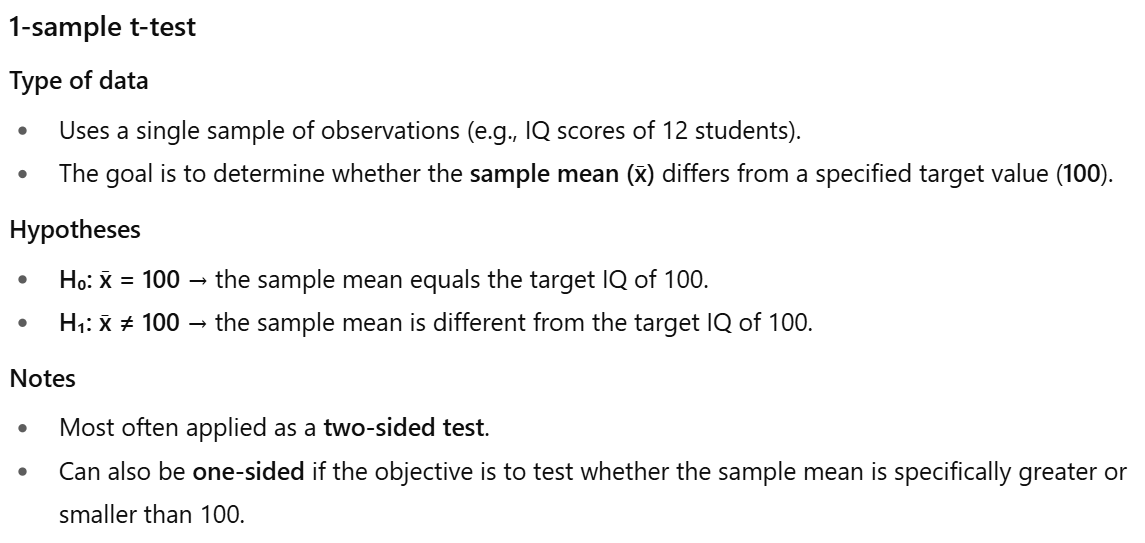

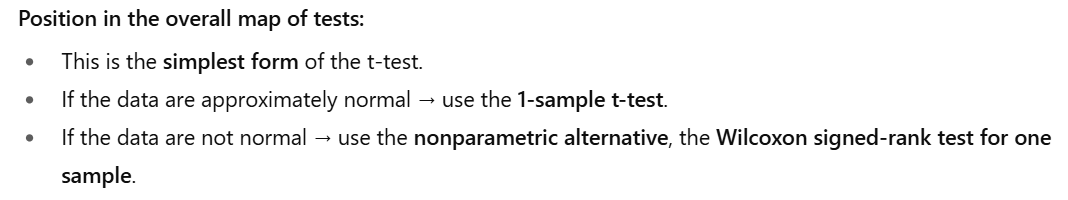

Shapiro–Wilk: W=0.989, p=1.000

1-sample t-test: t=1.365, df=11, p=0.199389
Sample mean = 101.67
95% CI for mean = (np.float64(98.9801129581447), np.float64(104.35322037518864))


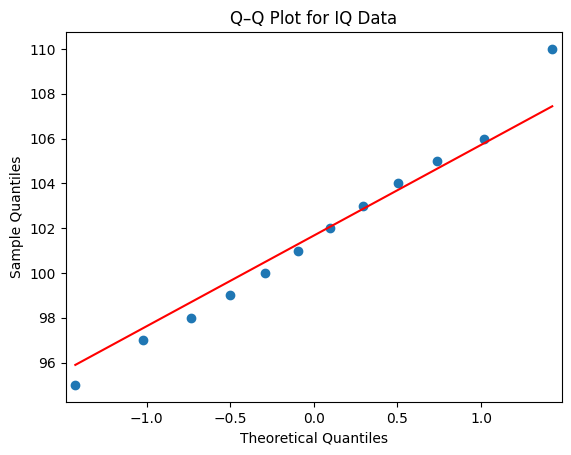

In [ ]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example data: IQ scores of 12 students
data = np.array([102, 98, 105, 110, 95, 99, 101, 97, 103, 106, 100, 104])

# Hypothesized mean (mu0)
mu0 = 100

# --- 1) Normality check (Shapiro–Wilk) ---
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f"Shapiro–Wilk: W={shapiro_stat:.3f}, p={shapiro_p:.3f}")

# --- 2) One-sample t-test ---
t_stat, p_val = stats.ttest_1samp(data, mu0)
print(f"\n1-sample t-test: t={t_stat:.3f}, df={len(data)-1}, p={p_val:.6f}")

# --- 3) 95% confidence interval ---
mean = np.mean(data)
sem = stats.sem(data)  # standard error
ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)
print(f"Sample mean = {mean:.2f}")
print(f"95% CI for mean = {ci}")

# --- 4) Visual check: Q–Q plot ---
sm.qqplot(data, line='s')
plt.title("Q–Q Plot for IQ Data")
plt.show()

#import statsmodels.api as sm
#Library/Package: statsmodels
#Module: statsmodels.api
#Alias/short name: sm
#Function example: sm.qqplot()


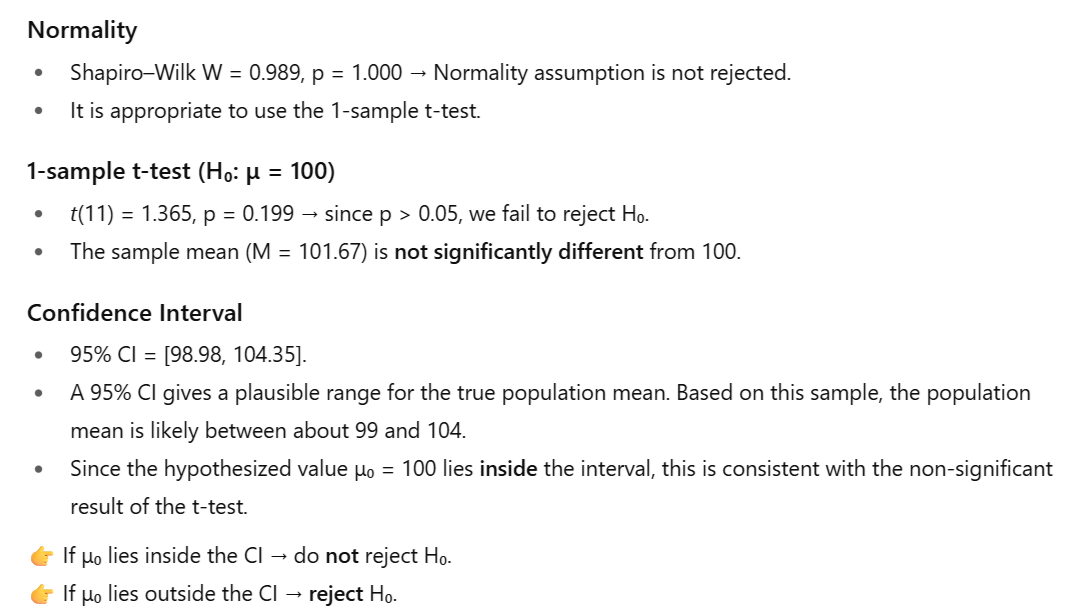

Wilcoxon signed-rank test (nonparametric alternative)

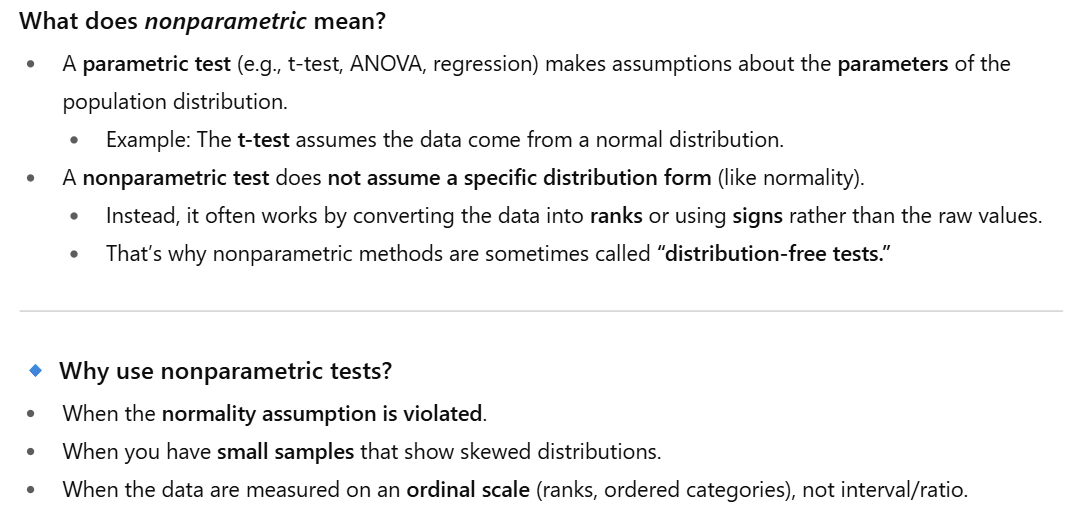

Shapiro–Wilk: W=0.809, p=0.001161

Wilcoxon signed-rank test: W=0.000, p=0.000002


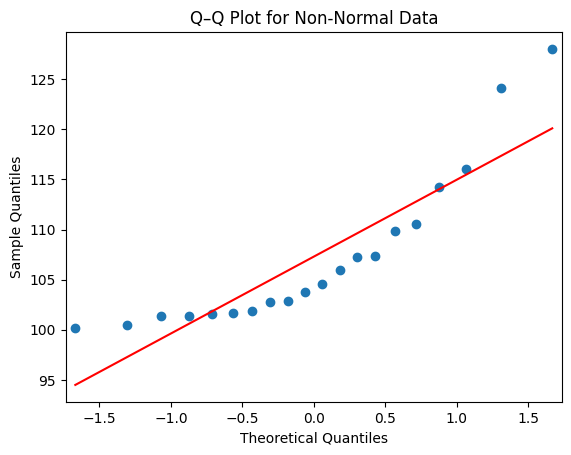

In [ ]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example data: skewed (non-normal) distribution
np.random.seed(42)
data = np.random.exponential(scale=8, size=20) + 100  # skewed data around 100

# Hypothesized median (mu0)
mu0 = 100

# --- 1) Normality check (Shapiro–Wilk) ---
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f"Shapiro–Wilk: W={shapiro_stat:.3f}, p={shapiro_p:.6f}")

if shapiro_p > 0.05:
    # --- 2a) One-sample t-test ---
    t_stat, p_val = stats.ttest_1samp(data, mu0)
    print(f"\n1-sample t-test: t={t_stat:.3f}, df={len(data)-1}, p={p_val:.6f}")

    # --- 3) 95% confidence interval ---
    mean = np.mean(data)
    sem = stats.sem(data)  # standard error
    ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)
    print(f"Sample mean = {mean:.2f}")
    print(f"95% CI for mean = {ci}")

else:
    # --- 2b) Wilcoxon signed-rank test (nonparametric alternative) ---
    w_stat, p_val = stats.wilcoxon(data - mu0, alternative='two-sided')
    print(f"\nWilcoxon signed-rank test: W={w_stat:.3f}, p={p_val:.6f}")

# --- 4) Visual check: Q–Q plot ---
sm.qqplot(data, line='s')
plt.title("Q–Q Plot for Non-Normal Data")
plt.show()


stats.wilcoxon(data - mu0,
    alternative='two-sided')



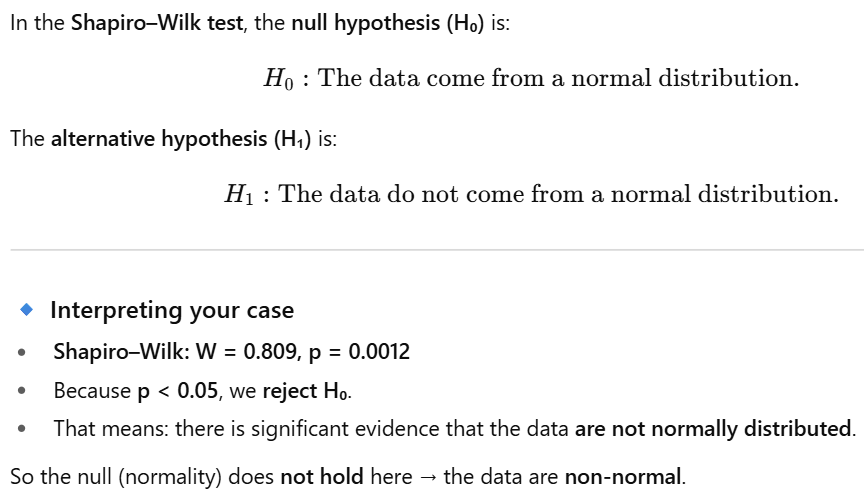

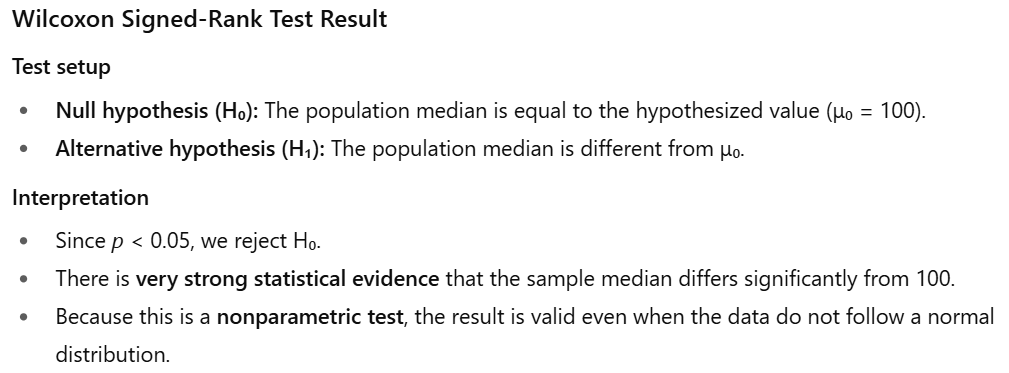

Practice in the Class

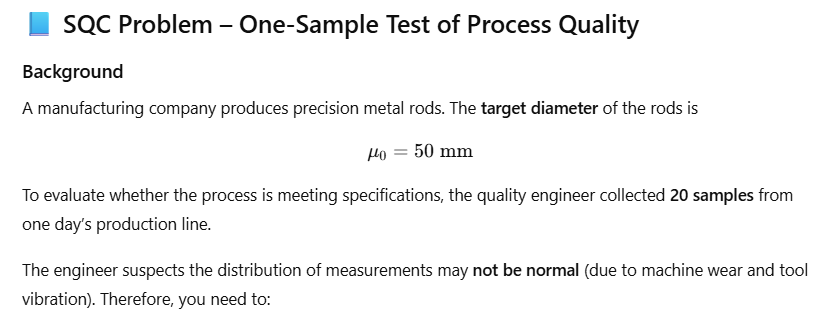

In [ ]:
# Data: 51.3, 49.7, 50.8, 52.1, 48.9,
 #      49.2, 50.5, 51.8, 52.4, 50.9,
#       49.8, 50.1, 48.5, 51.0, 49.4,
#       50.2, 49.6, 51.5, 52.0, 50.7


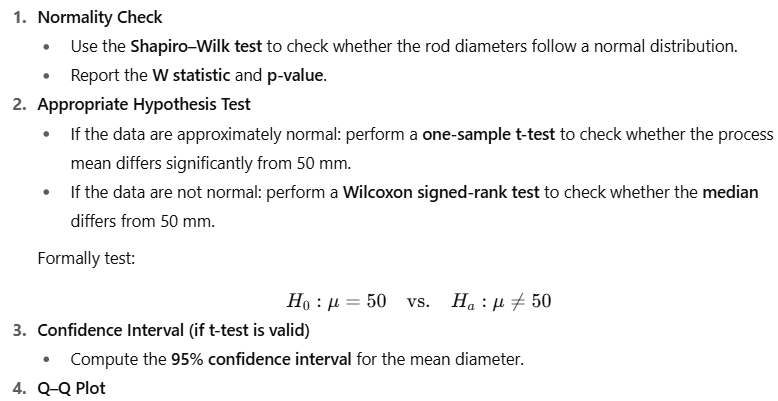

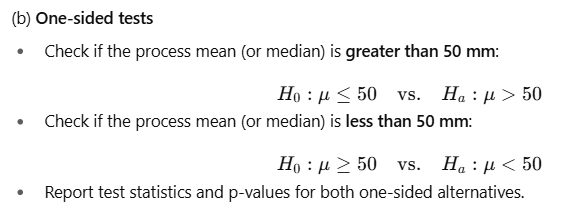

# Paired samples, before/after intervention

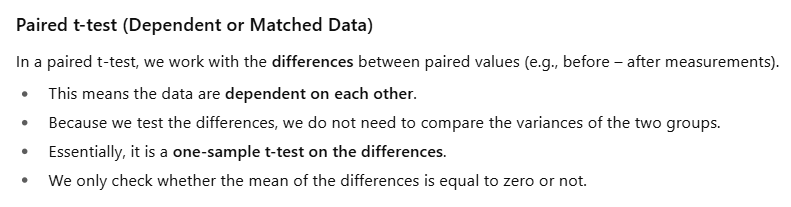

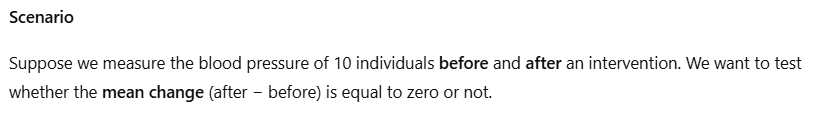

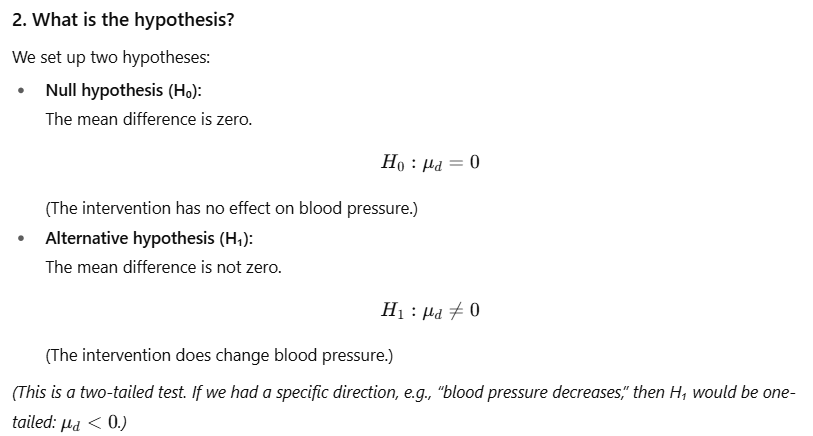

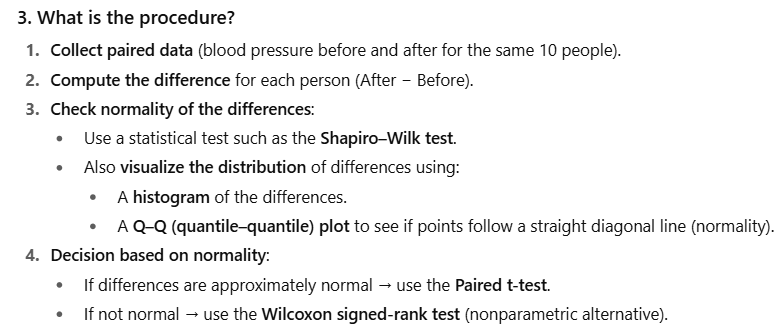

Shapiro–Wilk test: W=0.893, p=0.183


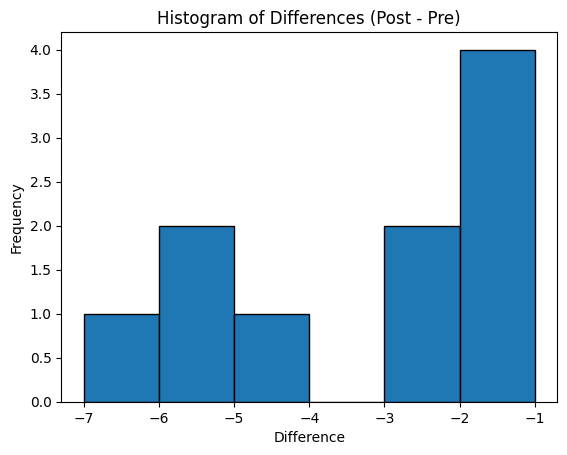

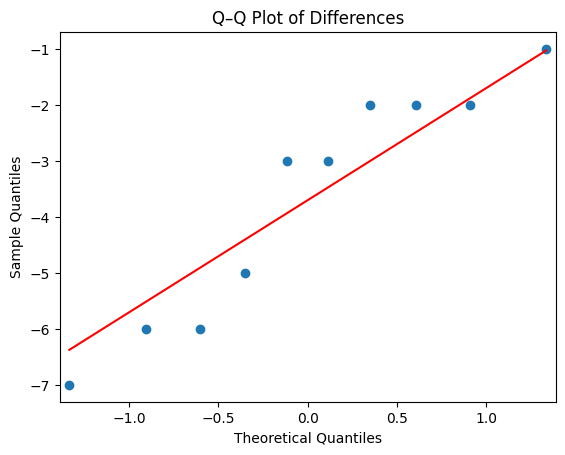

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Example data: before and after measurements
pre  = np.array([142, 138, 151, 147, 155, 149, 160, 152, 148, 150])
post = np.array([135, 137, 145, 144, 150, 147, 154, 149, 146, 148])

# Compute differences
diff = post - pre

# --- 1) Shapiro–Wilk test ---
shapiro_stat, shapiro_p = stats.shapiro(diff)
print(f"Shapiro–Wilk test: W={shapiro_stat:.3f}, p={shapiro_p:.3f}")

# --- 2) Histogram of differences ---
plt.hist(diff, bins=6, edgecolor='black')
plt.title("Histogram of Differences (Post - Pre)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

# --- 3) Q–Q plot ---
sm.qqplot(diff, line='s')
plt.title("Q–Q Plot of Differences")
plt.show()


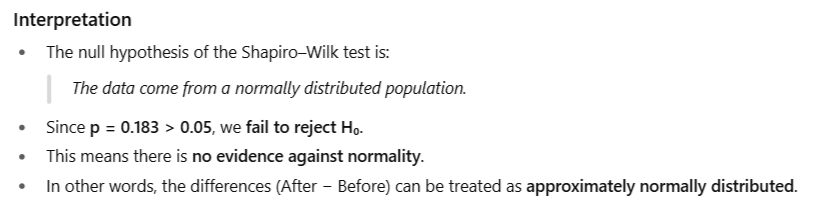

In [ ]:
import numpy as np
from scipy import stats

# Data
pre  = np.array([142, 138, 151, 147, 155, 149, 160, 152, 148, 150])
post = np.array([135, 137, 145, 144, 150, 147, 154, 149, 146, 148])

# Paired t-test
t_stat, p_val = stats.ttest_rel(post, pre)


# Degrees of freedom
df = len(pre) - 1

print(f"Paired t-test: t={t_stat:.3f}, df={df}, p={p_val:.6f}")
print(f"Mean difference (Post - Pre) = {np.mean(post - pre):.2f}")


Paired t-test: t=-5.543, df=9, p=0.000360
Mean difference (Post - Pre) = -3.70


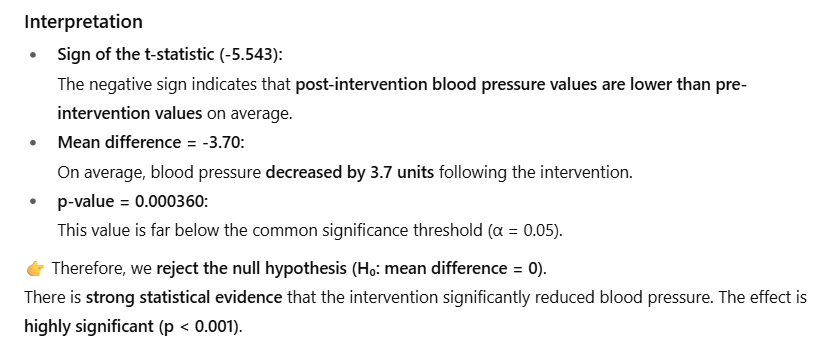

/tmp/ipython-input-3349078602.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre, post], labels=['Pre', 'Post'])


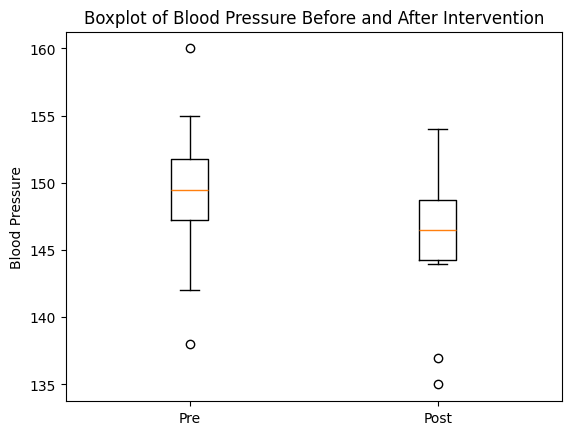

/tmp/ipython-input-3349078602.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(diff, labels=['Post - Pre'])


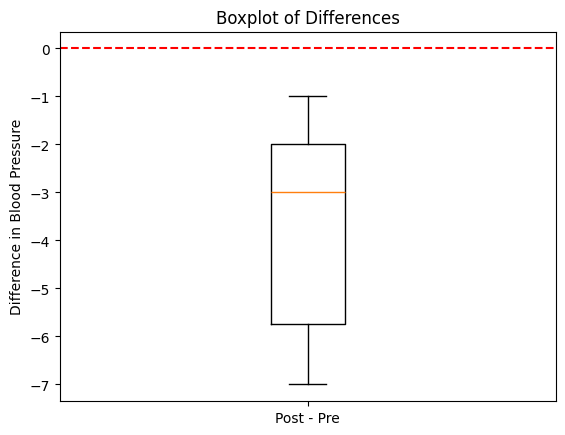

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# datas
pre  = np.array([142, 138, 151, 147, 155, 149, 160, 152, 148, 150])
post = np.array([135, 137, 145, 144, 150, 147, 154, 149, 146, 148])
diff = post - pre

# --- 1) Box plot, Pre - Post ---
plt.boxplot([pre, post], labels=['Pre', 'Post'])
plt.title("Boxplot of Blood Pressure Before and After Intervention")
plt.ylabel("Blood Pressure")
plt.show()

# --- 2) Box plot Differences ---
plt.boxplot(diff, labels=['Post - Pre'])
plt.title("Boxplot of Differences")
plt.ylabel("Difference in Blood Pressure")
plt.axhline(0, color='red', linestyle='--')  # Zero line is for comparison
plt.show()


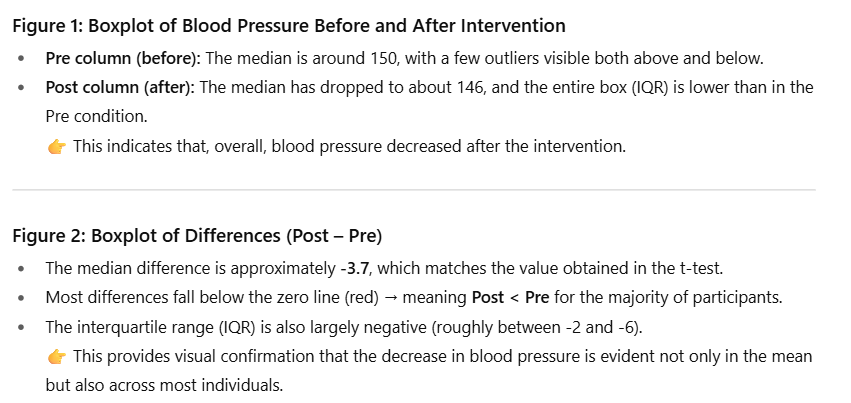

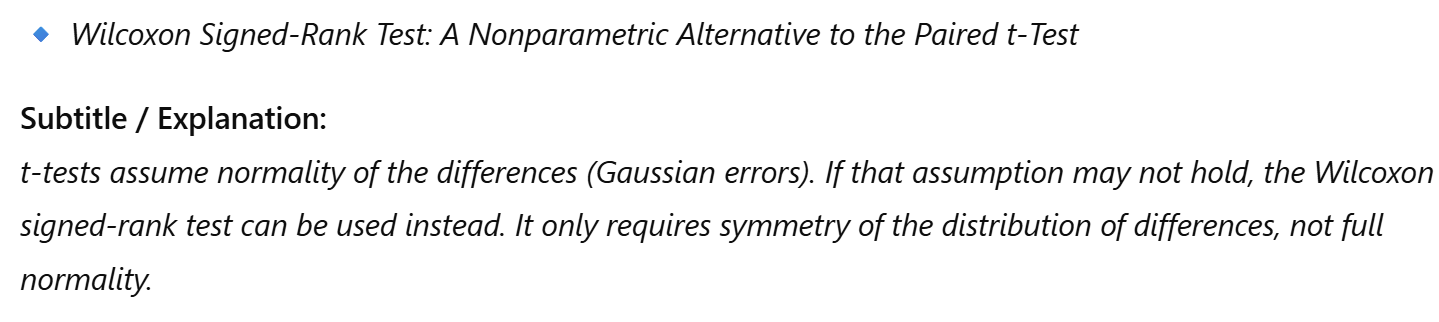

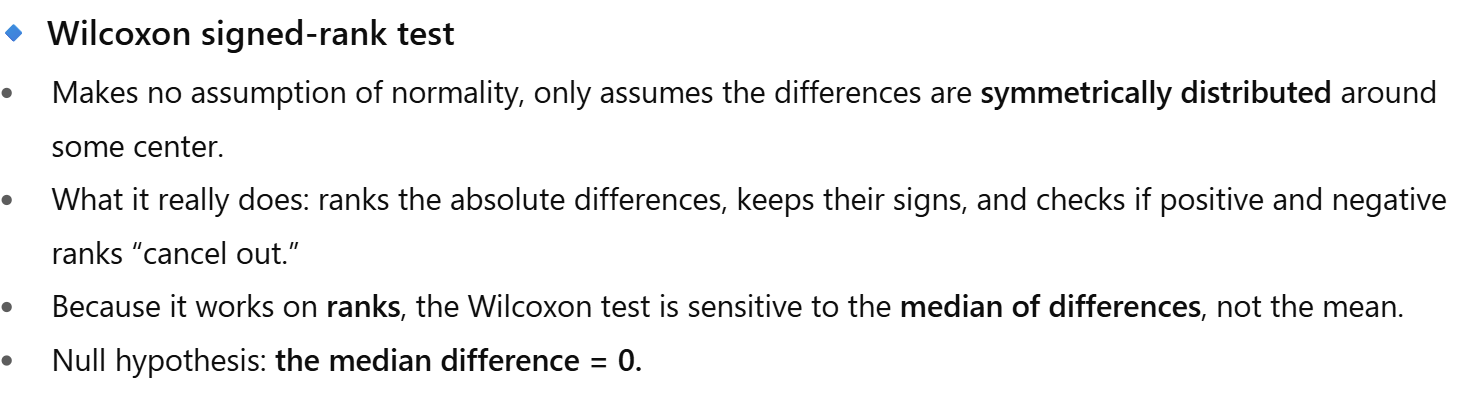

Shapiro-Wilk: W=0.838, p=0.00035
❌ Not normal → Wilcoxon signed-rank test
Wilcoxon test: W=0.000, p=0.00000


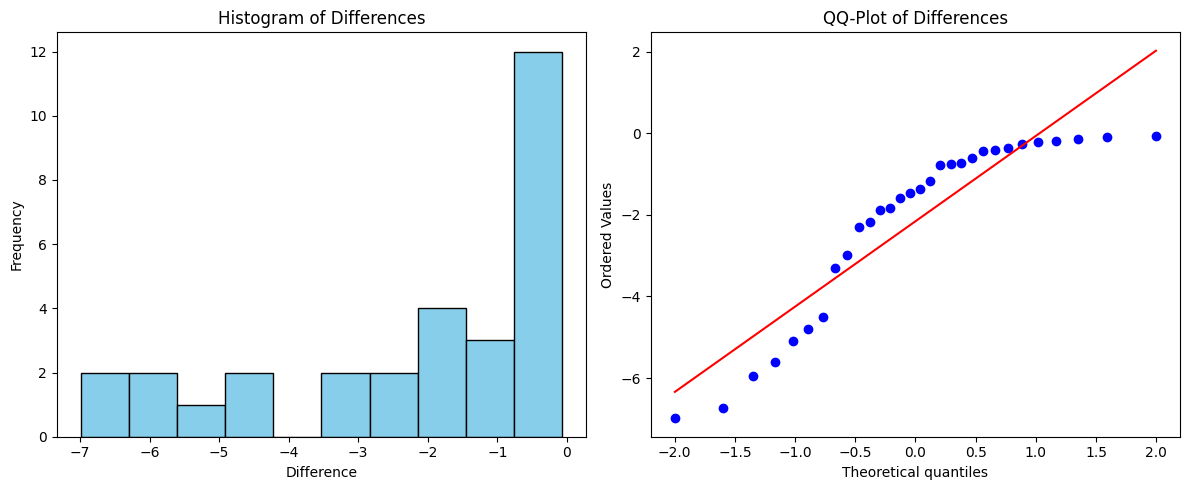

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro, ttest_rel, wilcoxon

# Reproducibility
np.random.seed(42)

# Generate two groups with non-normal differences (exponential distribution)
group1 = np.random.exponential(scale=2, size=30)
group2 = group1 + np.random.exponential(scale=2, size=30)

# Step 1: Differences
differences = group1 - group2

# Step 2: Shapiro-Wilk normality test
stat, p = shapiro(differences)
print(f"Shapiro-Wilk: W={stat:.3f}, p={p:.5f}")

# Step 3: Choose test
if p > 0.05:
    print("✅ Normal → Paired t-test")
    t_stat, t_p = ttest_rel(group1, group2)
    print(f"Paired t-test: t={t_stat:.3f}, p={t_p:.5f}")
else:
    print("❌ Not normal → Wilcoxon signed-rank test")
    w_stat, w_p = wilcoxon(group1, group2)

    print(f"Wilcoxon test: W={w_stat:.3f}, p={w_p:.5f}")

# Step 4: Visualization
plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1,2,1)
plt.hist(differences, bins=10, color="skyblue", edgecolor="black")
plt.title("Histogram of Differences")
plt.xlabel("Difference")
plt.ylabel("Frequency")

# QQ-Plot
plt.subplot(1,2,2)
stats.probplot(differences, dist="norm", plot=plt)
plt.title("QQ-Plot of Differences")

plt.tight_layout()
plt.show()


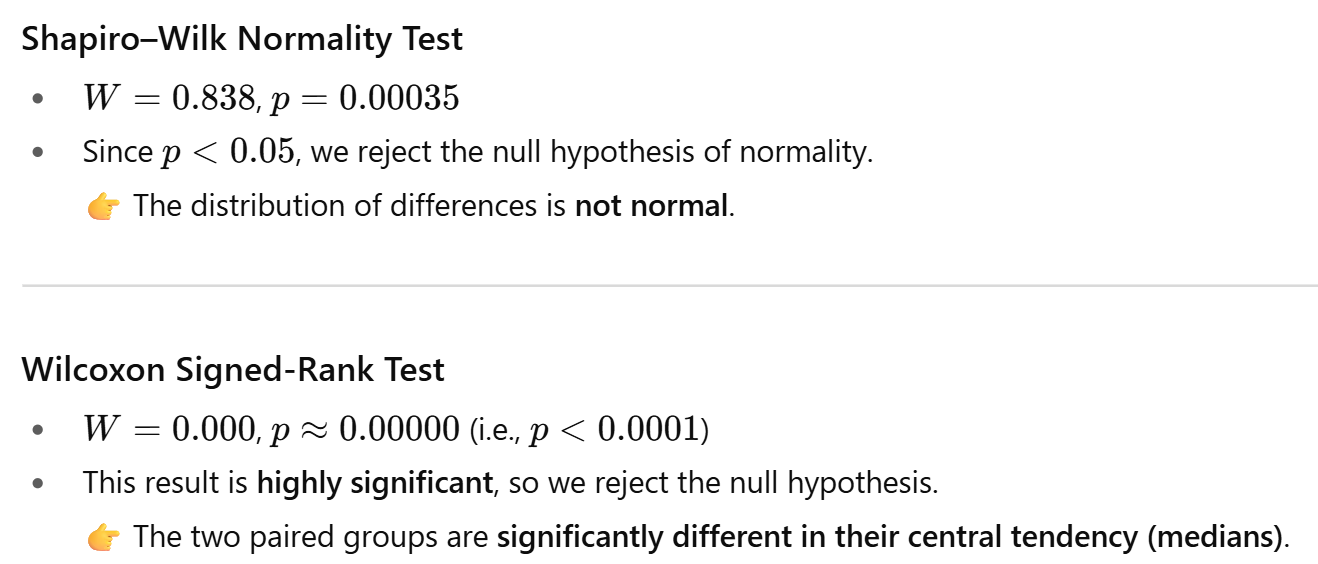

# Independent samples(Two Groups)


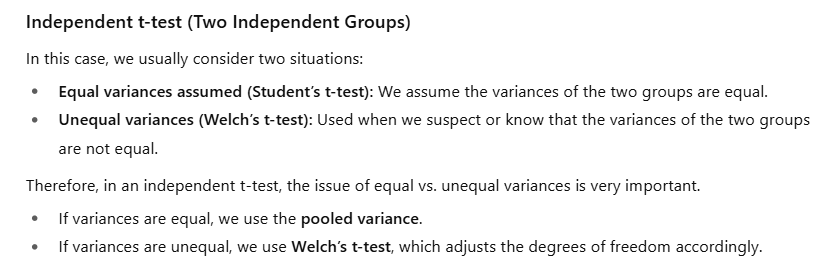

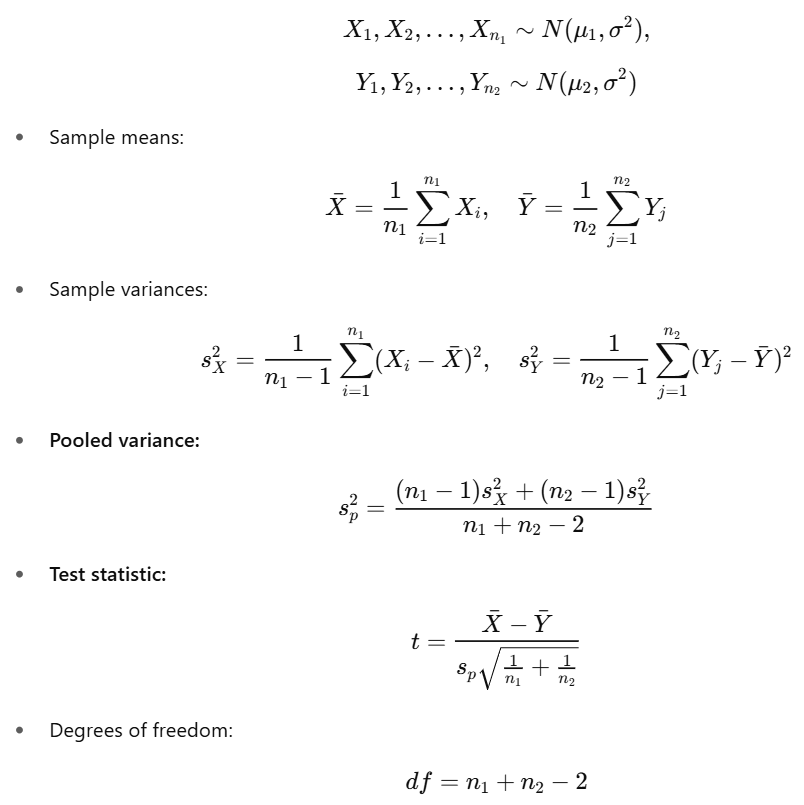

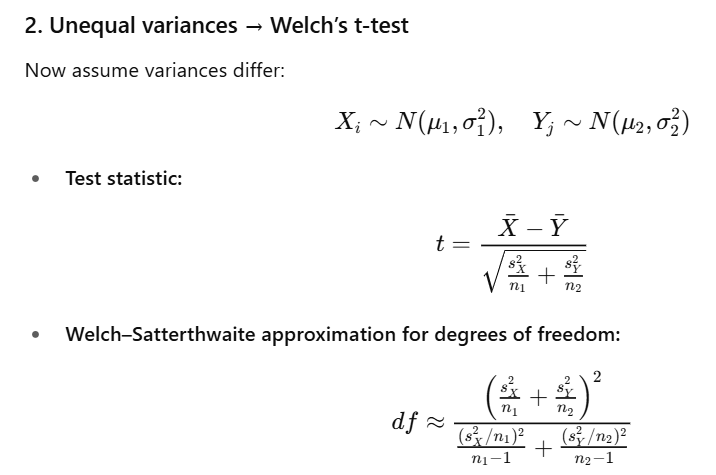

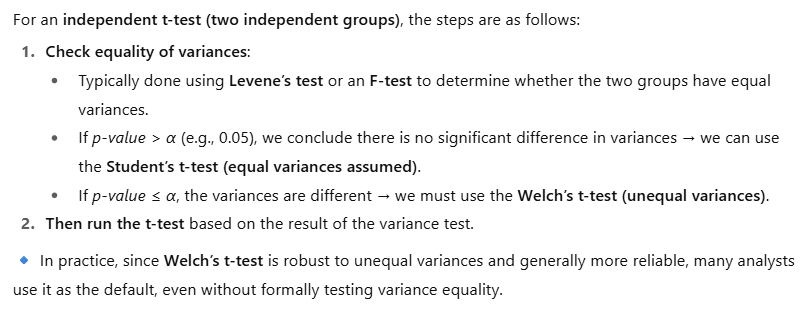

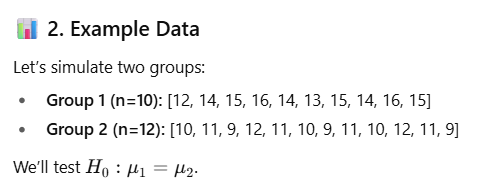

In [ ]:
import numpy as np
from scipy import stats

# Data, we assumed two groups belong to Normal Distribuation.
group1 = np.array([12, 14, 15, 16, 14, 13, 15, 14, 16, 15])
group2 = np.array([10, 11, 9, 12, 11, 10, 9, 11, 10, 12, 11, 9])

# 1. Check equal variances assumption (Levene’s test)
stat, p_levene = stats.levene(group1, group2)
print("Levene’s test for equal variances:")
print(f"Statistic={stat:.3f}, p-value={p_levene:.3f}")




Levene’s test for equal variances:
Statistic=0.102, p-value=0.753


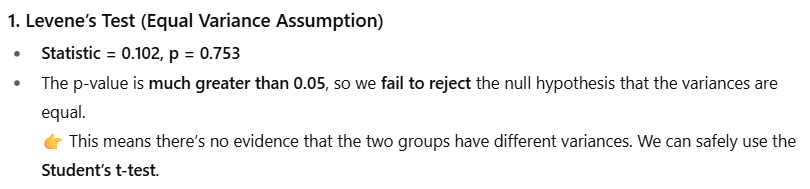

In [ ]:
import numpy as np
from scipy import stats

# Data, we assumed two groups belong to Normal Distribuation.
group1 = np.array([12, 14, 15, 16, 14, 13, 15, 14, 16, 15])
group2 = np.array([10, 11, 9, 12, 11, 10, 9, 11, 10, 12, 11, 9])

# 2. Student’s t-test (equal variances assumed)
t_stat_student, p_val_student = stats.ttest_ind(group1, group2, equal_var=True)

stats.ttest_ind(group1, group2,
                equal_var=False)



print("\nStudent’s t-test (equal variances):")
print(f"t-statistic={t_stat_student:.3f}, p-value={p_val_student:.10f}")




Student’s t-test (equal variances):
t-statistic=7.960, p-value=0.0000001259


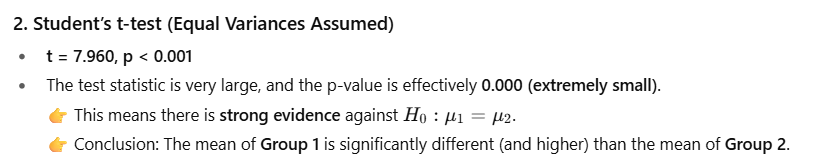

In [ ]:
import numpy as np
from scipy import stats
# Data, we assumed two groups belong to Normal Distribuation.
# Group 1: same as before (tighter spread)
group1 = np.array([12, 14, 15, 16, 14, 13, 15, 14, 16, 15])

# Group 2: same mean-ish, but larger spread (more variance)
group2 = np.array([5, 18, 7, 20, 8, 22, 6, 19, 9, 21, 7, 23])

# 1. Check equal variances assumption (Levene’s test)
stat, p_levene = stats.levene(group1, group2)
print("Levene’s test for equal variances:")
print(f"Statistic={stat:.3f}, p-value={p_levene:.10f}")



# 3. Welch’s t-test (unequal variances)
t_stat_welch, p_val_welch = stats.ttest_ind(group1, group2, equal_var=False)


print("\nWelch’s t-test (unequal variances):")
print(f"t-statistic={t_stat_welch:.3f}, p-value={p_val_welch:.3f}")


Levene’s test for equal variances:
Statistic=110.132, p-value=0.0000000014

Welch’s t-test (unequal variances):
t-statistic=0.306, p-value=0.765


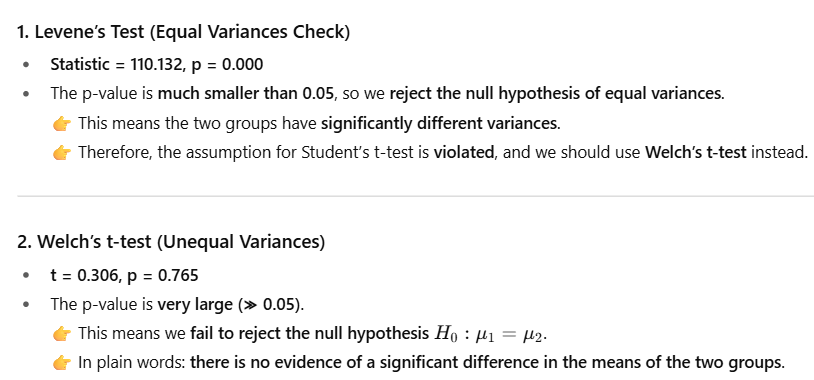

Practice n the Class

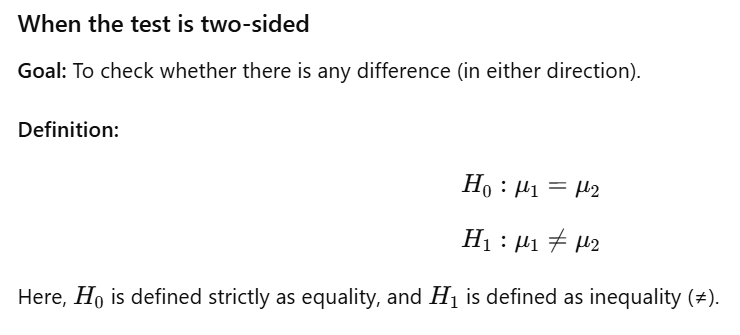

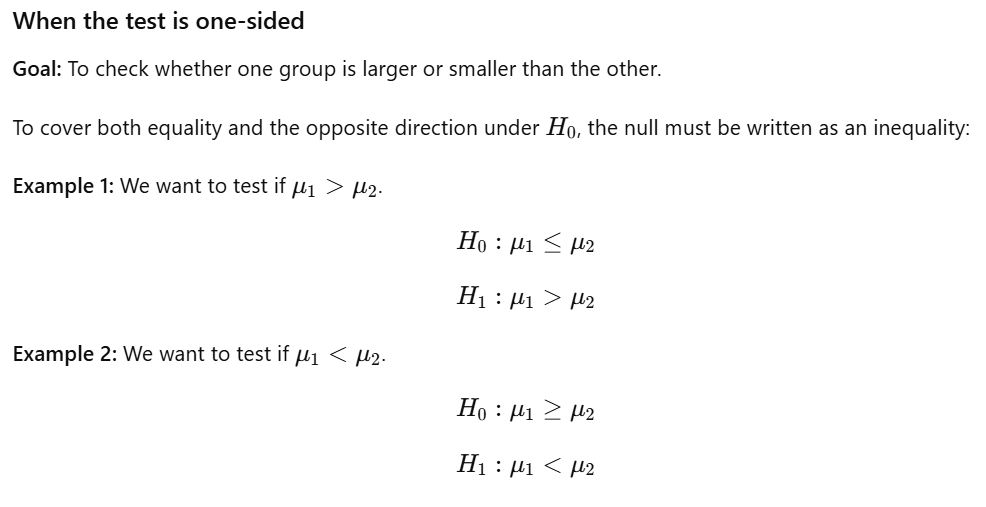

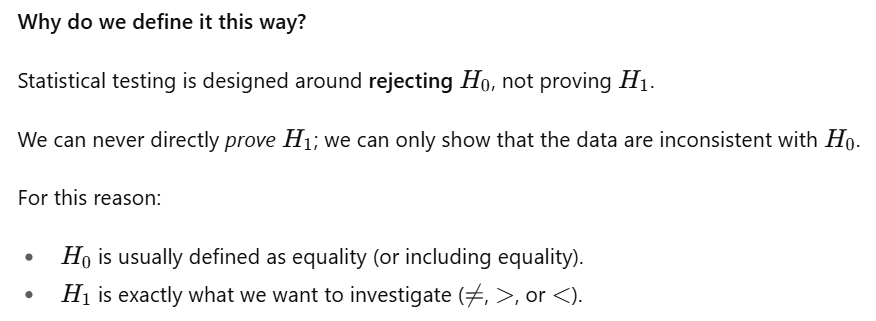

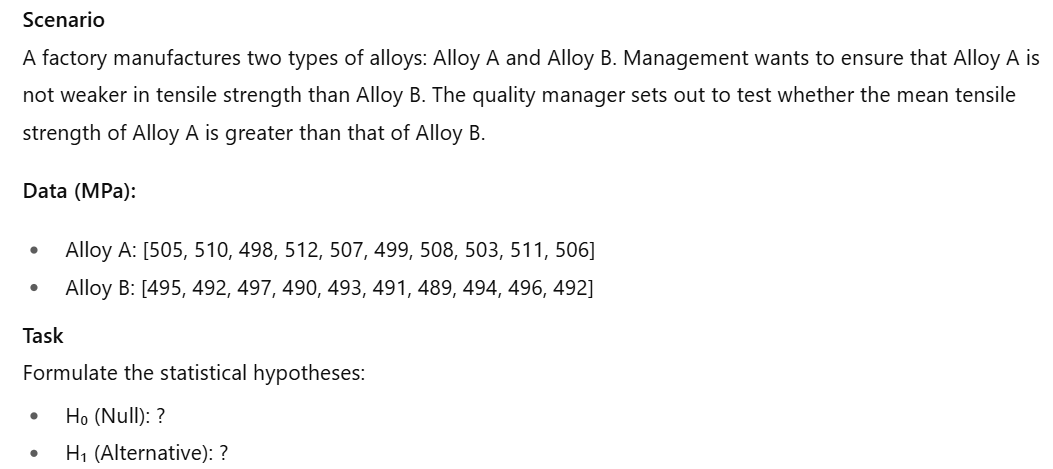

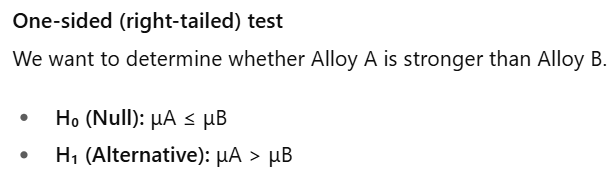

In [ ]:
import numpy as np
from scipy import stats

# Data: tensile strength of alloys (MPa), # Data, we assumed two groups belong to Normal Distribuation.

A = np.array([505, 510, 498, 512, 507, 499, 508, 503, 511, 506])
B = np.array([495, 492, 497, 490, 493, 491, 489, 494, 496, 492])

# Define hypotheses
print("Hypotheses for one-sided (right-tailed) test:")
print("H0: μA ≤ μB  (Alloy A is not stronger than Alloy B)")
print("H1: μA > μB  (Alloy A is stronger than Alloy B)\n")

# 1. Check equal variances (Levene’s test), we assumed two groups belong to Normal distribuation.
stat, p_levene = stats.levene(A, B)
print(f"Levene’s test for equal variances: stat={stat:.3f}, p={p_levene:.4f}")

# 2. One-sided t-test (right-tailed: H1: μA > μB)
t_res = stats.ttest_ind(A, B, equal_var=True, alternative='greater')
print(f"t-statistic = {t_res.statistic:.3f}, p-value = {t_res.pvalue:.10f}")

# 3. Interpretation
alpha = 0.05
if t_res.pvalue < alpha:
    print("Decision: Reject H0 → Alloy A is significantly stronger than Alloy B.")
else:
    print("Decision: Fail to reject H0 → Not enough evidence that Alloy A is stronger.")


Hypotheses for one-sided (right-tailed) test:
H0: μA ≤ μB  (Alloy A is not stronger than Alloy B)
H1: μA > μB  (Alloy A is stronger than Alloy B)

Levene’s test for equal variances: stat=2.560, p=0.1270
t-statistic = 7.565, p-value = 0.0000002693
Decision: Reject H0 → Alloy A is significantly stronger than Alloy B.


## F- test

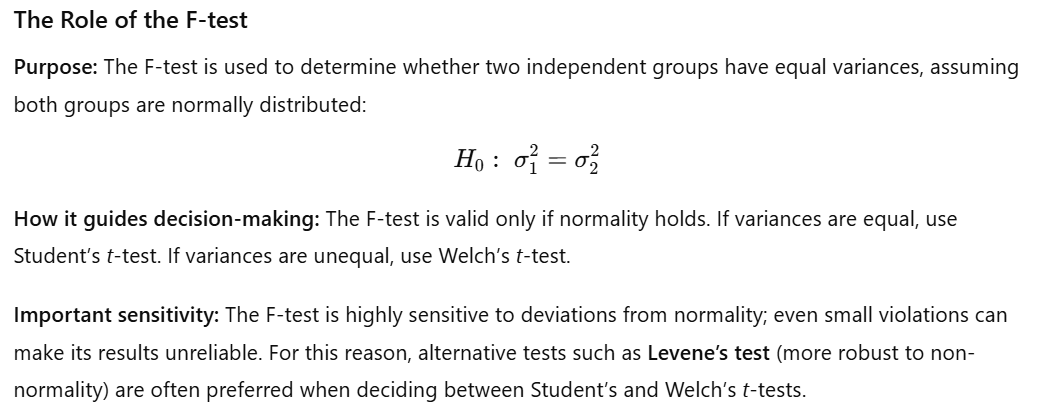

Shapiro–Wilk Test (Normality):
x: W=0.889, p=0.167
y: W=0.912, p=0.298

F-test for equal variances:
F = 4.387, df1=9, df2=9, p=0.038253

Levene’s test for equal variances:
Statistic = 10.807, p = 0.004094


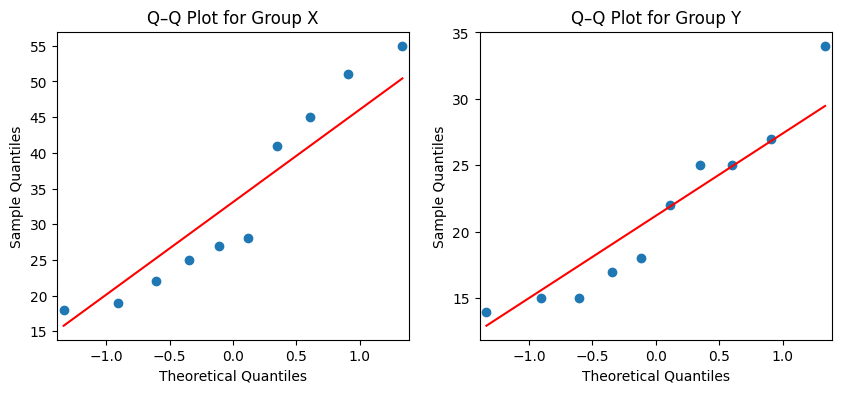

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Example data
x = np.array([18, 19, 22, 25, 27, 28, 41, 45, 51, 55])
y = np.array([14, 15, 15, 17, 18, 22, 25, 25, 27, 34])

# --- 1) Normality check (Shapiro-Wilk) ---
shapiro_x = stats.shapiro(x)
shapiro_y = stats.shapiro(y)

print("Shapiro–Wilk Test (Normality):")
print(f"x: W={shapiro_x[0]:.3f}, p={shapiro_x[1]:.3f}")
print(f"y: W={shapiro_y[0]:.3f}, p={shapiro_y[1]:.3f}")

# --- 2) F-test (only valid if both groups normal) ---
f_stat = np.var(x, ddof=1) / np.var(y, ddof=1)
dfn, dfd = len(x) - 1, len(y) - 1
p_value_f = 2 * min(stats.f.cdf(f_stat, dfn, dfd), 1 - stats.f.cdf(f_stat, dfn, dfd))

print("\nF-test for equal variances:")
print(f"F = {f_stat:.3f}, df1={dfn}, df2={dfd}, p={p_value_f:.6f}")

# --- 3) Levene’s test (robust alternative) ---
stat_levene, p_value_levene = stats.levene(x, y, center='mean')
print("\nLevene’s test for equal variances:")
print(f"Statistic = {stat_levene:.3f}, p = {p_value_levene:.6f}")

# --- 4) Optional plots (for visual normality check) ---
fig, axs = plt.subplots(1, 2, figsize=(10,4))
sm.qqplot(x, line='s', ax=axs[0])
axs[0].set_title("Q–Q Plot for Group X")
sm.qqplot(y, line='s', ax=axs[1])
axs[1].set_title("Q–Q Plot for Group Y")
plt.show()


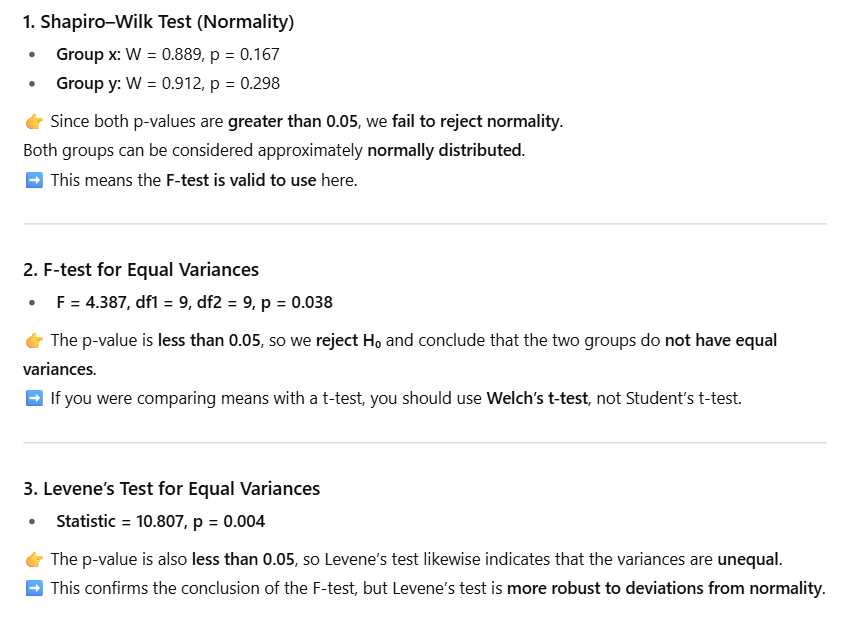